# # Data science project: marketing experiment
This project is to analysis e-commerce website UI experiment

In [69]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
#read the data
experiment=pd.read_csv("BAexperiment.csv")
users=pd.read_csv("BAusers.csv")

In [7]:
# Let's check what the data look like
experiment.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1


In [10]:
users.tail()

,user_id,sex,age,state
452780,106844,Female,21,New York
452781,907214,Male,22,Florida
452782,234616,Female,20,Airzona
452783,168038,Female,22,Florida
452784,954132,Male,18,California


In [20]:
print(users.shape)
print(experiment.shape)
# check duplicatin in users and experiment table
print(experiment['user_id'].nunique())
print(users['user_id'].nunique())

(452785, 4)
(453269, 9)
453269
452785


In [24]:
#join
df= experiment.merge(users, on=['user_id'])# pd.merge(experiment, users, on=['user_id'])
df.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0,Female,18,Texas
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0,Male,28,Massachusetts
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0,Female,24,California
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0,Male,34,Michigan
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1,Female,18,California


In [26]:
df.describe()

,user_id,conversion,condition,age
count,452733.000000,452733.000000,452733.000000,452733.000000
mean,499947.117970,0.049552,0.476484,27.130810
std,288678.018612,0.217019,0.499447,6.776542
min,1.000000,0.000000,0.000000,18.000000
25%,249831.000000,0.000000,0.000000,22.000000
50%,500014.000000,0.000000,0.000000,26.000000
75%,749541.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452733 entries, 0 to 452732
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     452733 non-null  int64 
 1   date        452733 non-null  object
 2   interface   452733 non-null  object
 3   language    452733 non-null  object
 4   channel     452733 non-null  object
 5   ads         181640 non-null  object
 6   device      452733 non-null  object
 7   conversion  452733 non-null  int64 
 8   condition   452733 non-null  int64 
 9   sex         452733 non-null  object
 10  age         452733 non-null  int64 
 11  state       452733 non-null  object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


In [32]:
#convert date to datetime
df['date']=pd.to_datetime(df['date'])
df.describe(include='all')

<ipython-input-32-f3c5e398932f>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
count,452733.000000,452733,452733,452733,452733,181640,452733,452733.000000,452733.000000,452733,452733.000000,452733
unique,NaN,5,2,3,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2019-12-04 00:00:00,app,English,Ads,Google,Sumsung,NaN,NaN,Male,NaN,California
freq,NaN,140982,251242,377048,181640,68339,154933,NaN,NaN,226380,NaN,128444
first,NaN,2019-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499947.117970,NaN,NaN,NaN,NaN,NaN,NaN,0.049552,0.476484,NaN,27.130810,NaN
std,288678.018612,NaN,NaN,NaN,NaN,NaN,NaN,0.217019,0.499447,NaN,6.776542,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249831.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN


In [37]:
# control conversion rate by device type
df.query('condition==0')
df.loc[df.condition==0].groupby('device')['conversion'].mean()

device
GooglePixel    0.054511
Huawei         0.054586
Oppo           0.056981
Sumsung        0.055985
Xiaomi         0.057170
iPad           0.052804
iPhone         0.054575
Name: conversion, dtype: float64

In [39]:
#test conversion rate by state,sort descending
df.loc[df.condition==0].groupby('state')['conversion'].mean().sort_values(ascending=False)

state
Pennsylvania      0.079656
Massachusetts     0.053567
Texas             0.052678
Washington        0.052256
Florida           0.052056
Airzona           0.050906
Virginia          0.050545
New York          0.050356
Michigan          0.049929
California        0.049498
Georgia           0.049405
Illinois          0.049154
Ohio              0.048493
New Jersey        0.048132
Tennessee         0.046796
North Carolina    0.015079
Indiana           0.012048
Name: conversion, dtype: float64

In [40]:
#test conversion rate by state,sort descending
df.loc[df.condition==1].groupby('state')['conversion'].mean().sort_values(ascending=False)

state
Washington        0.054779
Texas             0.054210
New Jersey        0.051305
California        0.051183
Florida           0.050590
Michigan          0.050557
Tennessee         0.049370
Ohio              0.049229
New York          0.048997
Illinois          0.048995
Virginia          0.048654
Massachusetts     0.047947
Georgia           0.047918
Airzona           0.047551
North Carolina    0.013727
Indiana           0.012917
Name: conversion, dtype: float64

Pennsylvania has the highest conversion rate in control group, but not exist in test group. the experiment has some issue as it didn't test a key state.in the following analysis, I'll exclude PA. we should investigate why PA is missing in the test group.

In [56]:
df.loc[df.state!='Pennsylvania'].groupby('condition').count()

,user_id,date,interface,language,channel,ads,device,conversion,sex,age,state
condition,,,,,,,,,,,
0,185253,185253,185253,185253,185253,74329,185253,185253,185253,185253,185253
1,215720,215720,215720,215720,215720,86428,215720,215720,215720,215720,215720


In [60]:
#pennsylvania only have users in control group; so exclude them from data
df=df.loc[df.state!='Pennsylvania']
#t-test of test and control for conversion rate 
test=stats.ttest_ind(df[df.condition==1]['condition'],df[df.condition==0]['condition'],equal_var=False) # independent two samples (how to return numbers instead of inf?)
test

Ttest_indResult(statistic=inf, pvalue=0.0)

In [62]:
print("the prelinminary t-test p value is:", test.pvalue, "; and t-statistic is :", test.statistic)

the prelinminary t-test p value is: 0.0 ; and t-statistic is : inf


In [59]:
df.groupby('condition')['conversion'].mean()

condition
0    0.048291
1    0.043413
Name: conversion, dtype: float64

##preliminary t-test show the new UI has a stats-sig regression than old UI in control. the conversion rate of control group is 5% higher. there are a couple of hypothesis we can think of :
1. new UI is really worse
2. there is more bias associated with experiment data
3. they didn't collect enough data in some segments

we'll continue to investigate the experiment data, to see if users in test and control groups are randomly sampled with any bias, and sufficient in necessary group segments. before deriving any conclusions about the t-test results. only when exluded hypothesis 2) and 3), we can take hypothesis 1), and have learnings in future UI design and product from this experiment.


###4.Exam experiment bias:

4.1 by time

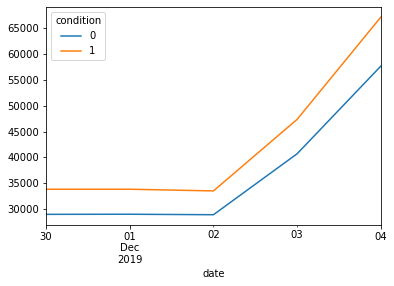

In [67]:
#let's check number of samples and conversion rate day by day
# to see if there is some wilderness in someday by comparing number of samples and conversion rate between test and control groups overtime
Temp=df.groupby(['date','condition'])['user_id'].count().unstack().plot()

In [71]:
df.groupby('date')['conversion'].agg(ratio = lambda a:a[df.condition==1].mean()/a[df.condition==0].mean())

,ratio
date,
2019-11-30,0.858002
2019-12-01,0.894586
2019-12-02,0.911110
2019-12-03,0.891067
2019-12-04,0.923195


##Conclusion:
1.treatment group is consistently worse than the control group
2.the experiment has not ran for 1-2 weeks to capture weekly pattern. 12/03-0 has more traffic, probably due to weekly parrtern. There is some limitation about the date. 

4.2 device

In [82]:
device_count = df.groupby('device')['condition'].agg(count_treatment=lambda a:len(a[a==1]), count_control=lambda  a:len(a[a==0]))

In [84]:
device_count*100/device_count.sum()

,count_treatment,count_control
device,,
GooglePixel,10.263768,10.308605
Huawei,13.541628,13.696944
Oppo,8.971352,8.973134
Sumsung,34.345448,34.130082
Xiaomi,1.336455,1.346267
iPad,8.946319,9.218744
iPhone,22.595031,22.326224


Conclusion: treatment and control are well balanced and comparable, no bias in device